<a href="https://colab.research.google.com/github/ahussain1724/Project1/blob/main/Search_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import time
from collections import deque

class Graph:
    def __init__(self, adjacency_list):
        self.graph = adjacency_list

    def dfs(self, start, goal):
        stack = [(start, [start])]
        while stack:
            (vertex, path) = stack.pop()
            for next in self.graph[vertex] - set(path):
                if next == goal:
                    return path + [next]
                else:
                    stack.append((next, path + [next]))
        return None

    def bfs(self, start, goal):
        queue = deque([(start, [start])])
        while queue:
            (vertex, path) = queue.popleft()
            for next in self.graph[vertex] - set(path):
                if next == goal:
                    return path + [next]
                else:
                    queue.append((next, path + [next]))
        return None

    def bidirectional_search(self, start, goal):
        queue1 = deque([(start, [start])])
        queue2 = deque([(goal, [goal])])
        while queue1 and queue2:
            if queue1[0][0] == queue2[0][0]:
                path1 = queue1.popleft()[1]
                path2 = queue2.popleft()[1]
                return path1 + path2[::-1]
            if queue1[0][0] < queue2[0][0]:
                vertex, path = queue1.popleft()
                for next in self.graph[vertex] - set(path):
                    queue1.append((next, path + [next]))
            else:
                vertex, path = queue2.popleft()
                for next in self.graph[vertex] - set(path):
                    queue2.append((next, path + [next]))
        return None

graphs = [
    {
        'adjacency_list': {
            'A': {'B', 'C'},
            'B': {'A', 'D', 'E'},
            'C': {'A', 'F'},
            'D': {'B'},
            'E': {'B', 'F'},
            'F': {'C', 'E'}
        },
        'start': 'A',
        'goal': 'F'
    },
    {
        'adjacency_list': {
            'A': {'B', 'C'},
            'B': {'A', 'C', 'D'},
            'C': {'A', 'B', 'D', 'E'},
            'D': {'C'},
            'E': {'C'}
        },
        'start': 'A',
        'goal': 'E'
    }
]

for graph_data in graphs:
    graph = Graph(graph_data['adjacency_list'])
    start = graph_data['start']
    goal = graph_data['goal']

    print(f"Graph: {graph_data['adjacency_list']}")
    print(f"Start: {start}")
    print(f"Goal: {goal}")

    for algorithm, name in [(graph.dfs, 'DFS'), (graph.bfs, 'BFS'), (graph.bidirectional_search, 'Bidirectional Search')]:
        start_time = time.time()
        path = algorithm(start, goal)
        end_time = time.time()

        print(f"{name}: {path} ({end_time - start_time} seconds)")

Graph: {'A': {'B', 'C'}, 'B': {'E', 'D', 'A'}, 'C': {'F', 'A'}, 'D': {'B'}, 'E': {'B', 'F'}, 'F': {'E', 'C'}}
Start: A
Goal: F
DFS: ['A', 'C', 'F'] (1.1444091796875e-05 seconds)
BFS: ['A', 'C', 'F'] (1.1444091796875e-05 seconds)
Bidirectional Search: ['A', 'C', 'F', 'F'] (1.52587890625e-05 seconds)
Graph: {'A': {'B', 'C'}, 'B': {'D', 'A', 'C'}, 'C': {'E', 'B', 'D', 'A'}, 'D': {'C'}, 'E': {'C'}}
Start: A
Goal: E
DFS: ['A', 'C', 'E'] (6.67572021484375e-06 seconds)
BFS: ['A', 'C', 'E'] (7.3909759521484375e-06 seconds)
Bidirectional Search: ['A', 'C', 'E', 'E'] (1.52587890625e-05 seconds)


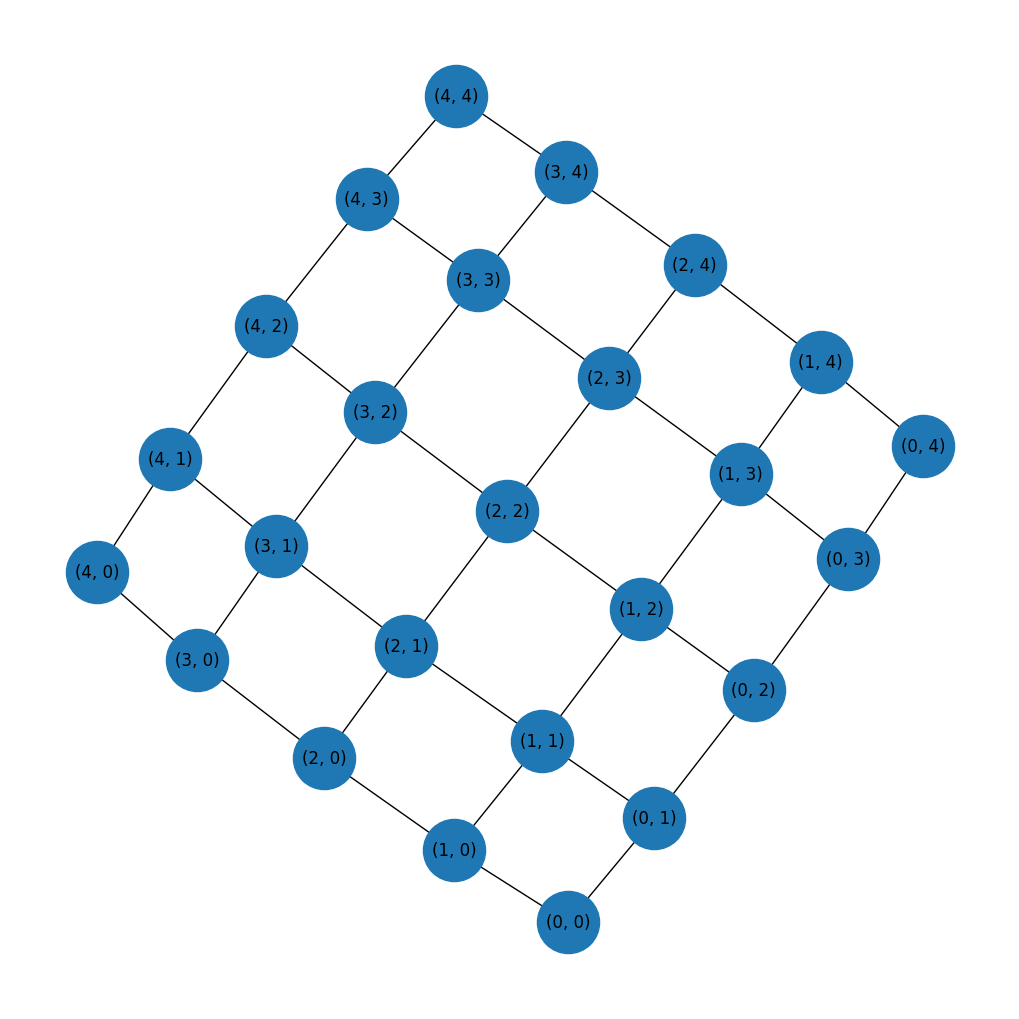

DFS:


In [ ]:
import time
import networkx as nx
import matplotlib.pyplot as plt

# Graph Construction
def create_graph(graph_type):
    if graph_type == 'grid':
        G = nx.grid_2d_graph(5, 5)
    elif graph_type == 'tree':
        G = nx.balanced_tree(2, 3)
    elif graph_type == 'cycle':
        G = nx.cycle_graph(10)
    return G

# DFS
def dfs(G, start, goal):
    stack = [(start, [start])]
    while stack:
        (vertex, path) = stack.pop()
        for next in G.neighbors(vertex):
            if next == goal:
                return path + [next]
            else:
                stack.append((next, path + [next]))

# BFS
def bfs(G, start, goal):
    queue = [(start, [start])]
    while queue:
        (vertex, path) = queue.pop(0)
        for next in G.neighbors(vertex):
            if next == goal:
                return path + [next]
            else:
                queue.append((next, path + [next]))

# Bidirectional Search
def bidirectional_search(G, start, goal):
    queue1 = [(start, [start])]
    queue2 = [(goal, [goal])]
    while queue1 and queue2:
        (vertex1, path1) = queue1.pop(0)
        (vertex2, path2) = queue2.pop(0)
        if vertex1 == vertex2:
            return path1 + path2[::-1]
        if len(queue1) > len(queue2):
            queue1, queue2 = queue2, queue1
    return None

# Testing and Comparison
def test_algorithms(G, start, goal):
    print("DFS:")
    start_time = time.time()
    path = dfs(G, start, goal)
    end_time = time.time()
    print("Path:", path)
    print("Time:", end_time - start_time)
    print("Nodes Visited:", len(path) - 1)

    print("\nBFS:")
    start_time = time.time()
    path = bfs(G, start, goal)
    end_time = time.time()
    print("Path:", path)
    print("Time:", end_time - start_time)
    print("Nodes Visited:", len(path) - 1)

    print("\nBidirectional Search:")
    start_time = time.time()
    path = bidirectional_search(G, start, goal)
    end_time = time.time()
    print("Path:", path)
    print("Time:", end_time - start_time)
    print("Nodes Visited:", len(path) - 1)

# Visualization
def visualize_graph(G):
    plt.figure(figsize=(10, 10))
    nx.draw(G, with_labels=True, node_size=2000, font_size=12,)
    plt.show()

# Main
def main():
    G = create_graph('grid')
    start = (0, 0)
    goal = (4, 4)
    visualize_graph(G)
    test_algorithms(G, start, goal)

if __name__ == "__main__":
    main()